In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split 

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/autompg-dataset/auto-mpg.csv


In [3]:
df= pd.read_csv("/kaggle/input/autompg-dataset/auto-mpg.csv")

In [4]:
df = df.drop(columns='car name', axis=1)

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [8]:
df= df.dropna()

In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [10]:
scaler = StandardScaler()
df[['displacement', 'horsepower', 'weight', 'acceleration']] = scaler.fit_transform(df[['displacement', 'horsepower', 'weight', 'acceleration']])

In [11]:
X = df.drop('mpg', axis=1)
Y= df['mpg']                     

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
def plot_pred_vs_actual(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Predicted vs. Actual Values')
    plt.show()

In [14]:
lr=LinearRegression()

In [15]:
lr.fit(X_train, Y_train)

LinearRegression()

In [16]:
y_pred_lr = lr.predict(X_test)

In [17]:
mse_lr = mean_squared_error(Y_test, y_pred_lr)
r2_lr = r2_score(Y_test, y_pred_lr)
print(f'Mean Squared Error: {mse_lr}')
print(f'R-squared: {r2_lr}')

Mean Squared Error: 10.710864418838394
R-squared: 0.7901500386760345


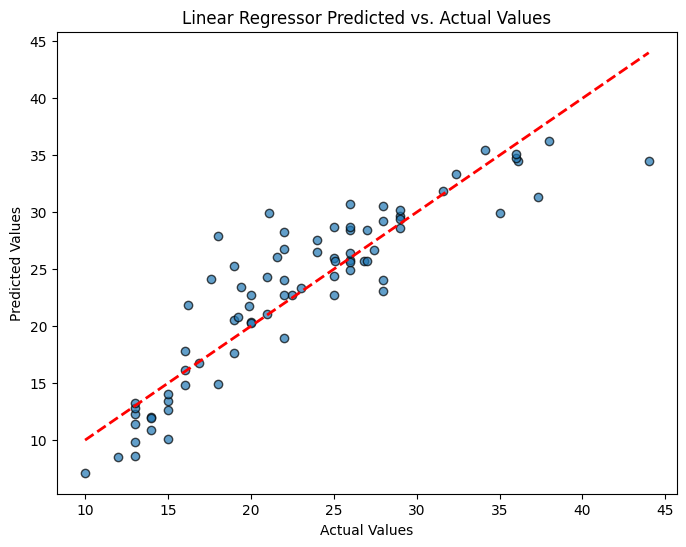

In [18]:
plot_pred_vs_actual(Y_test, y_pred_lr, 'Linear Regressor')

In [19]:
lasso_r = Lasso(alpha=0.1)
lasso_r.fit(X_train,Y_train)

Lasso(alpha=0.1)

In [20]:
y_pred_lasso = lasso_r.predict(X_test)

In [21]:
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
r2_lasso = r2_score(Y_test, y_pred_lasso)
print(f'MSE Lasso: {mse_lasso}, R2 Score: {r2_lasso}')

MSE Lasso: 10.902594521048284, R2 Score: 0.7863936140813379


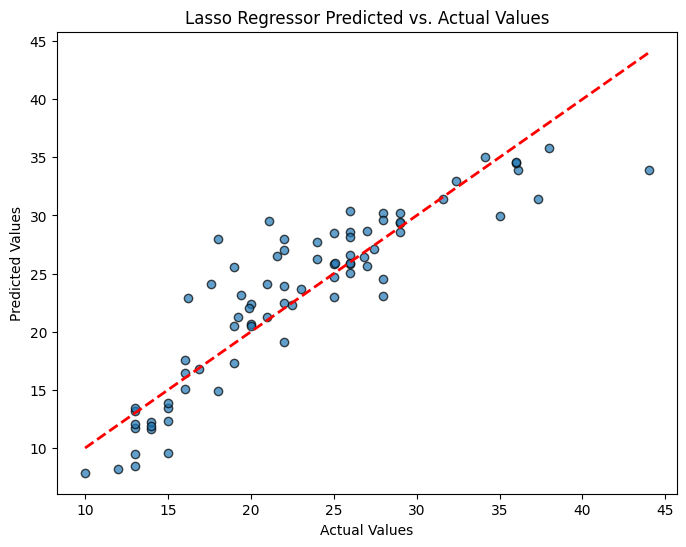

In [22]:
plot_pred_vs_actual(Y_test, y_pred_lasso, 'Lasso Regressor')

In [23]:
ridge_r = Ridge(alpha=0.1)
ridge_r.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [24]:
y_pred_ridge = ridge_r.predict(X_test)

In [25]:
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
r2_ridge = r2_score(Y_test, y_pred_ridge)
print(f'MSE Ridge: {mse_ridge}, R2 Score: {r2_ridge}')

MSE Ridge: 10.716673516252579, R2 Score: 0.7900362253720822


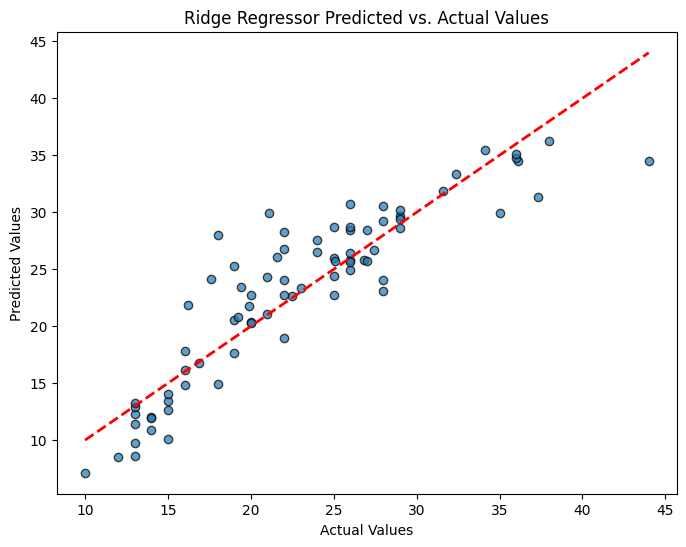

In [26]:
plot_pred_vs_actual(Y_test, y_pred_ridge, 'Ridge Regressor')

In [27]:
elastic_r = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_r.fit(X_train, Y_train)

ElasticNet(alpha=0.1, random_state=42)

In [28]:
y_pred_elastic = elastic_r.predict(X_test)

In [29]:
mse_elastic = mean_squared_error(Y_test, y_pred_elastic)
r2_elastic = r2_score(Y_test, y_pred_elastic)
print(f'MSE Decision Tree: {mse_elastic}, R2 Score Decision tree: {r2_elastic}')

MSE Decision Tree: 11.045921102856067, R2 Score Decision tree: 0.7835855234853857


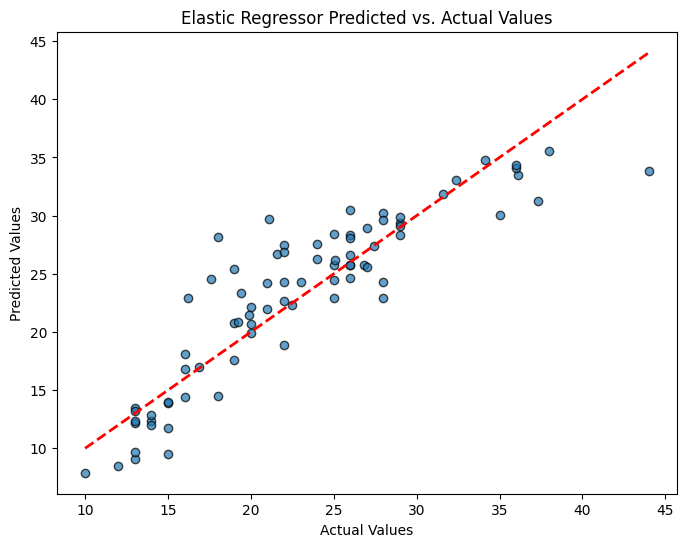

In [30]:
plot_pred_vs_actual(Y_test, y_pred_elastic, 'Elastic Regressor')

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [32]:
dt_r = DecisionTreeRegressor(random_state=42)
dt_r.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [33]:
y_pred_dt = dt_r.predict(X_test)

In [34]:
mse_dt = mean_squared_error(Y_test, y_pred_dt)
r2_dt = r2_score(Y_test, y_pred_dt)
print(f'MSE Decision Tree: {mse_dt}, R2 Score Decision tree: {r2_dt}')

MSE Decision Tree: 11.42848101265823, R2 Score Decision tree: 0.7760903130955608


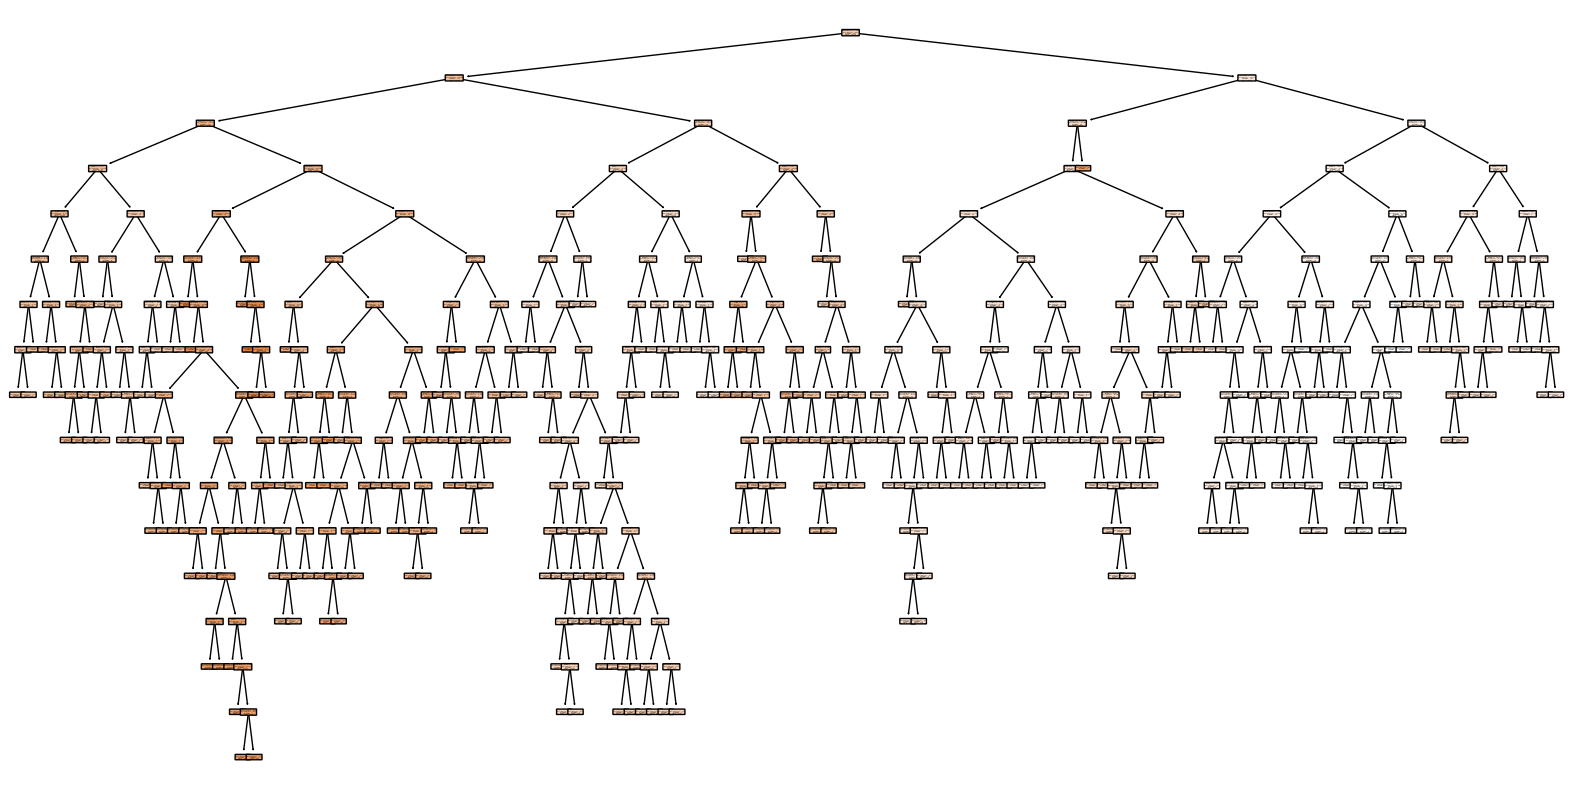

In [35]:
plt.figure(figsize=(20, 10))
plot_tree(dt_r, filled=True, feature_names=X.columns, rounded=True)
plt.show()

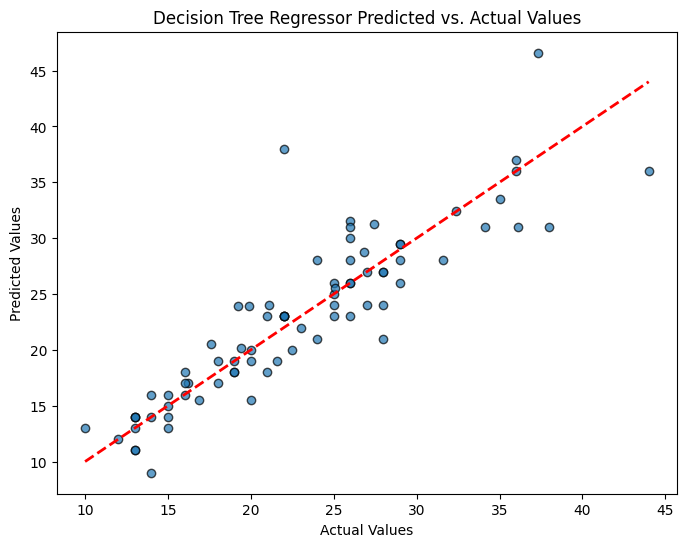

In [36]:
plot_pred_vs_actual(Y_test, y_pred_dt, 'Decision Tree Regressor')

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf_r = RandomForestRegressor(n_estimators=150,random_state=42)
rf_r.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [39]:
y_pred_rf =rf_r.predict(X_test)

In [40]:
mse_rf = mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)
print(f"MSE Random Forest: {mse_rf}, R2 Score: {r2_rf}")

MSE Random Forest: 5.715781530239089, R2 Score: 0.888014964418064


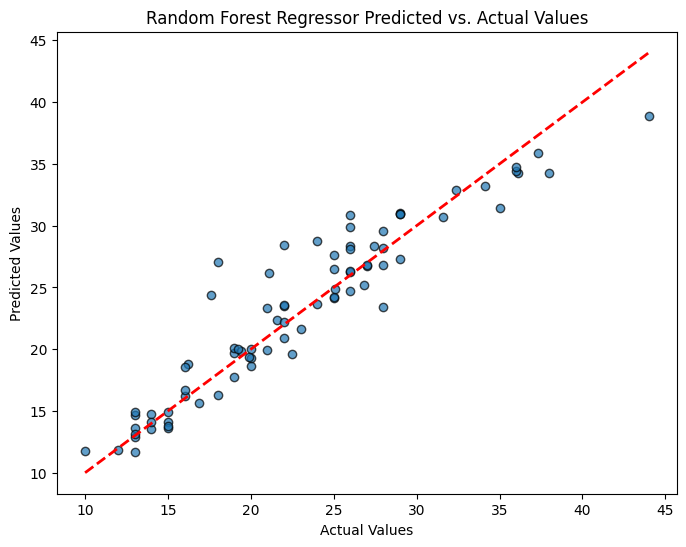

In [41]:
plot_pred_vs_actual(Y_test, y_pred_rf, 'Random Forest Regressor')

In [42]:
from sklearn.svm import SVR

In [43]:
svr = SVR(kernel='linear') 
svr.fit(X_train, Y_train)

SVR(kernel='linear')

In [44]:
y_pred_svr = svr.predict(X_test)

In [45]:
mse_svr = mean_squared_error(Y_test, y_pred_svr)
r2_svr = r2_score(Y_test, y_pred_svr)
print(f'MSE SVR: {mse_svr}, R2 Score SVR: {r2_svr}')

MSE SVR: 11.300983198906907, R2 Score SVR: 0.7785882824693069


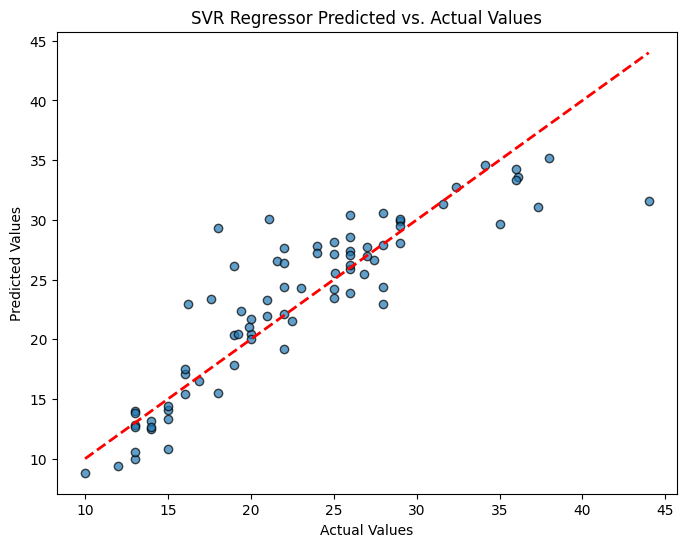

In [46]:
plot_pred_vs_actual(Y_test, y_pred_svr, 'SVR Regressor')

In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
knn_r = KNeighborsRegressor(n_neighbors=5)
knn_r.fit(X_train, Y_train)

KNeighborsRegressor()

In [49]:
y_pred_knn = knn_r.predict(X_test)

In [50]:
mse_knn = mean_squared_error(Y_test, y_pred_knn)
r2_knn = r2_score(Y_test, y_pred_knn)
print(f'MSE KNN: {mse_knn}, R2 Score KNN: {r2_knn}')

MSE KNN: 7.229037974683546, R2 Score KNN: 0.8583668619006437


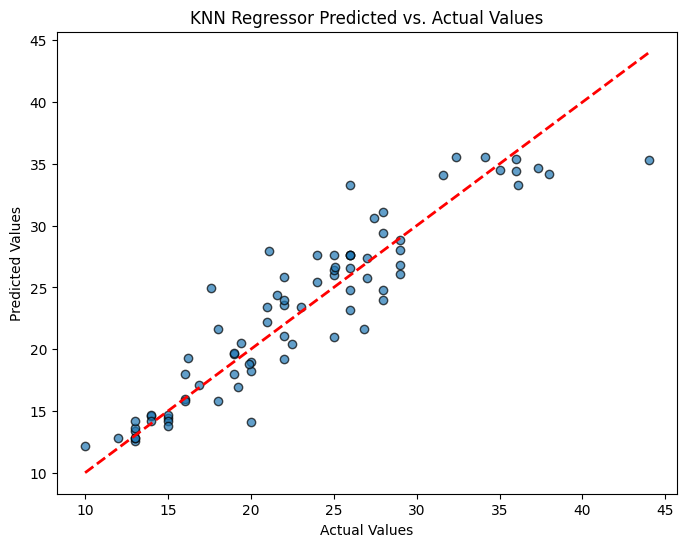

In [51]:
plot_pred_vs_actual(Y_test, y_pred_knn, 'KNN Regressor')

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
gbr = GradientBoostingRegressor(n_estimators=250, learning_rate=0.1, max_depth=5, min_samples_split=2)
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=250)

In [54]:
y_pred_gbr = gbr.predict(X_test)

In [55]:
mse_gbr = mean_squared_error(Y_test, y_pred_gbr)
r2_gbr = r2_score(Y_test, y_pred_gbr)
print(f'MSE GBR: {mse_gbr}, R2 Score GBR: {r2_gbr}')

MSE GBR: 6.5169404713085495, R2 Score GBR: 0.8723184560669661


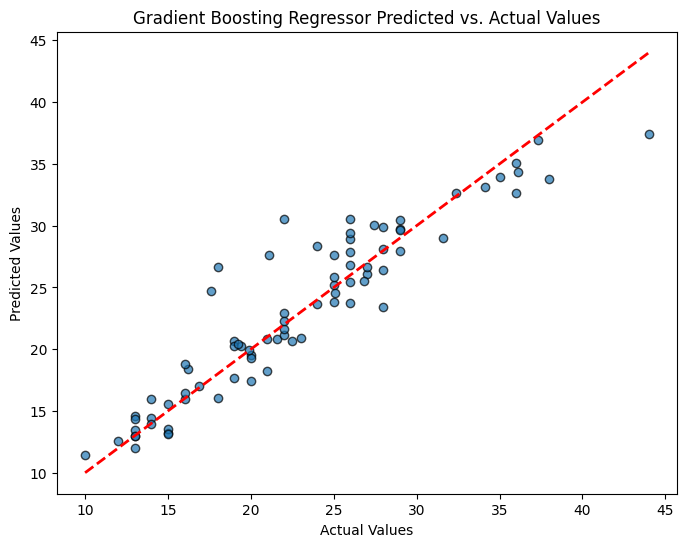

In [56]:
plot_pred_vs_actual(Y_test, y_pred_gbr, 'Gradient Boosting Regressor')